In [1]:
import pandas as pd
import re
import string 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# suppress display of warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading data
data = pd.read_csv("SMSSpamCollection (1)",sep='\t',names=["label","message"])
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# checking for missing data
data.isnull().sum()

label      0
message    0
dtype: int64

In [4]:
# checking for duplicate messages
data.duplicated().sum()

np.int64(403)

In [5]:
# drop duplicate message to prevent any chance of overfitting
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.shape

(5169, 2)

# Exploratory Data Analysis

In [8]:
data["label"].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

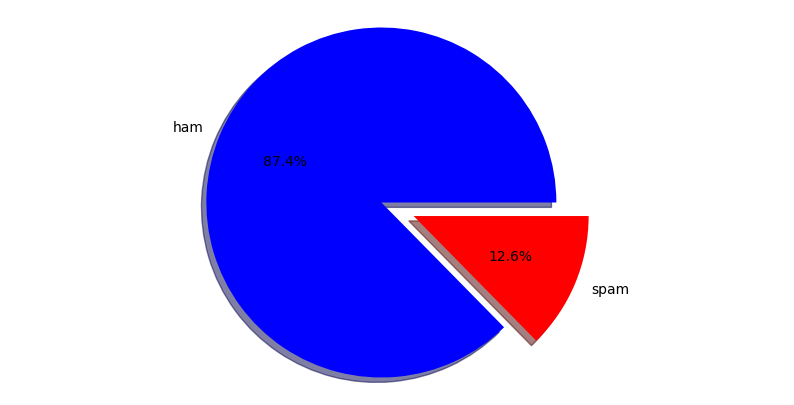

In [9]:
# to see in trems of percentage
plt.figure(figsize=(10,5))
plt.pie(data["label"].value_counts(),labels=["ham","spam"],autopct="%1.1f%%",colors=["b","r"],explode=(0,0.2),shadow=True)
plt.axis("equal")
plt.show()

***so , we can observe that the dataset is quite imbalanced since we just have 12.6% spam messages and remaining 87.3% messages are not spam.***

In [10]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
s1="rimsha katoch"
len(s1)


13

In [12]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# to ge the number of character in each message
data["char_count"]=data["message"].apply(len)
data.head()

,label,message,char_count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
# for non-spam messages
data[data["label"]=="ham"]["char_count"].describe()

count    4516.000000
mean       70.905890
std        56.715046
min         2.000000
25%        34.000000
50%        53.000000
75%        91.000000
max       910.000000
Name: char_count, dtype: float64

In [15]:
# for spam messages
data[data["label"]=="spam"]["char_count"].describe()

count    653.000000
mean     137.704441
std       29.821348
min       13.000000
25%      132.000000
50%      148.000000
75%      157.000000
max      223.000000
Name: char_count, dtype: float64

<Axes: xlabel='char_count', ylabel='Count'>

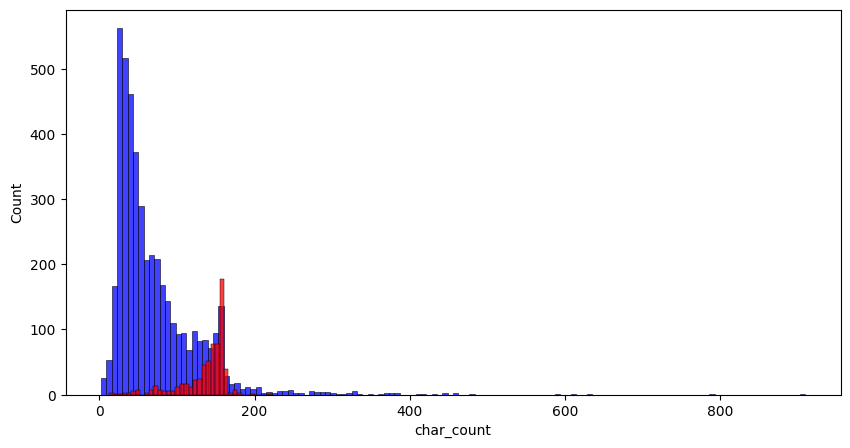

In [16]:
# Let's plot the graph for the above analysis
plt.figure(figsize=(10,5))
sns.histplot(data[data["label"]=="ham"]["char_count"],color="blue")
sns.histplot(data[data["label"]=="spam"]["char_count"],color="red")

***So , we can observe that the number of characters in spam messages is more than that of ham messages***

# Word Cloud

In [17]:
! pip install wordcloud

In [18]:
from wordcloud import WordCloud 

In [19]:
# For non-spam messages 
ham_msga_text = data[data["label"]=="ham"]["message"]
ham_msga_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 4516, dtype: object

In [20]:
# For spam messages 
spam_msga_text = data[data["label"]=="spam"]["message"]
spam_msga_text

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: message, Length: 653, dtype: object

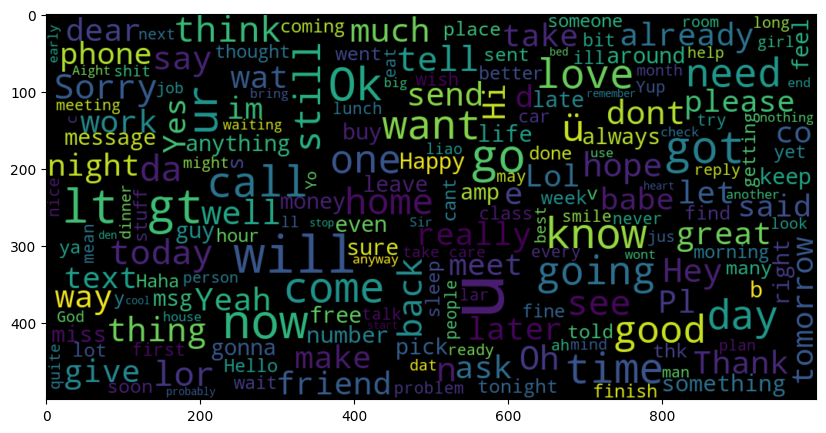

In [21]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=1000,height=500,max_font_size=100).generate(" ".join(ham_msga_text))
plt.imshow(wordcloud, interpolation='bilinear')

***Graph reveals the most comman keywords in ham message***

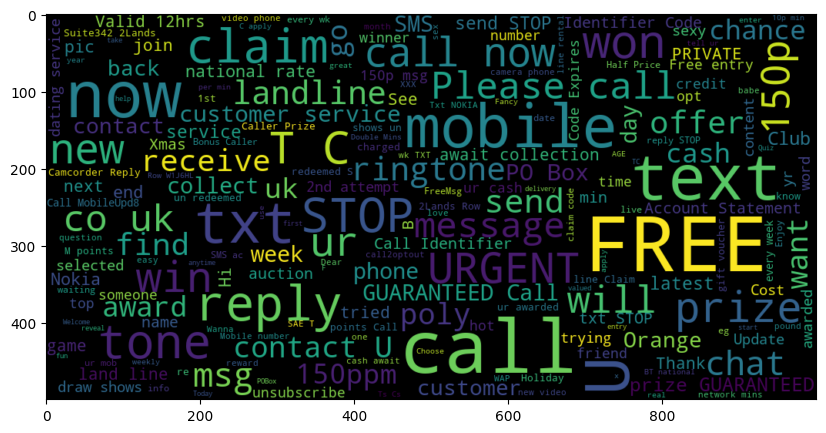

In [22]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=1000,height=500,max_font_size=100).generate(" ".join(spam_msga_text))
plt.imshow(wordcloud, interpolation='bilinear')

***Graph reveals the most comman keywords in spam message***

# Data Clearning & Preprocessing

In [23]:
data["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [24]:
# Remove Punctuation
def remove_punctuation(message):
    message = message.translate(str.maketrans("","",string.punctuation))
    return message

In [25]:
data["message"] = data["message"].apply(remove_punctuation)

In [26]:
data["message"][8]

'WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only'

In [27]:
# Remove special characters
def remove_special_chars(message):
    message = re.sub("[^a-zA-Z]"," ",message)
    return message

In [28]:
data["message"] = data["message"].apply(remove_special_chars)

In [29]:
data["message"][8]

'WINNER As a valued network customer you have been selected to receivea      prize reward To claim call             Claim code KL    Valid    hours only'

In [30]:
# Remove Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [33]:
len(sw)

179

In [35]:
def remove_stopwords(message):
    message = " ".join([word for word in message.split() if word.lower() not in sw])
    return message

In [36]:
data["message"] = data["message"].apply(remove_stopwords)

In [37]:
data["message"][8]

'WINNER valued network customer selected receivea prize reward claim call Claim code KL Valid hours'

In [38]:
# Convert to lowercase 
def to_lowercase(message):
    return message.lower()
data['message'] = data['message'].apply(to_lowercase)

In [39]:
data['message'][8]

'winner valued network customer selected receivea prize reward claim call claim code kl valid hours'

In [40]:
data.head()

,label,message,char_count
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


In [41]:
# labeled encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])

In [42]:
data.head()

,label,message,char_count
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts st ...,155
3,0,u dun say early hor u c already say,49
4,0,nah dont think goes usf lives around though,61


In [43]:
data = data[['label', 'message']]
data.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


# Feature Extraction

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tf = TfidfVectorizer(max_features=2500)

In [46]:
x=tf.fit_transform(data["message"]).toarray()
y=data["label"]

In [47]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 2500))

In [48]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

# Model Building & Evaluation

In [50]:
# split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4135, 2500), (4135,), (1034, 2500), (1034,))

In [52]:
# Model Creation
from sklearn.naive_bayes import BernoulliNB

In [53]:
nb = BernoulliNB()

In [54]:
# Fit the training into model
nb.fit(X_train, y_train)

BernoulliNB()

In [55]:
# Make a Prediction on test data
y_pred = nb.predict(X_test)

In [56]:
# Predicted Labels
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1034,))

In [57]:
# Actual Labels
y_test

1617    0
2064    1
1272    0
3020    0
3642    1
       ..
4146    0
1208    0
4795    0
3575    0
2820    0
Name: label, Length: 1034, dtype: int64

In [58]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [59]:
# Accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  98.54932301740811


In [60]:
# Classification Report
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       1.00      0.89      0.94       140

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [61]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[894,   0],
       [ 15, 125]])

Text(70.72222222222221, 0.5, 'Actual Labels')

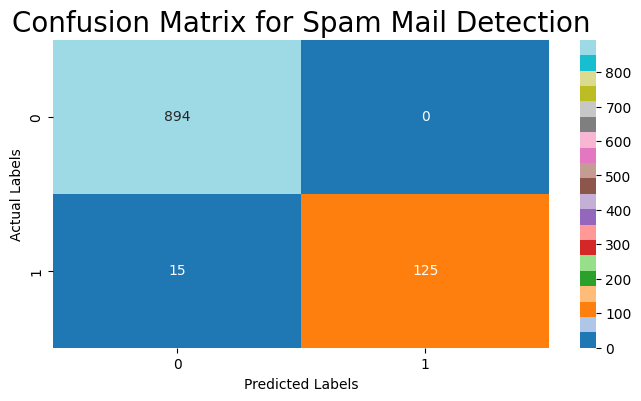

In [64]:
plt.figure(figsize = (8, 4))
sns.heatmap(cm, annot = True, cmap = 'tab20', fmt = 'd')
plt.title("Confusion Matrix for Spam Mail Detection", size = 20)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

# Save the Model

In [65]:
import pickle
pickle.dump(tf, open('vectors.pkl', 'wb'))
pickle.dump(nb, open('model.pkl', 'wb'))